In [1]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
from bokeh.sampledata.iris import flowers
import numpy as np
import scipy.stats as st
from matplotlib_venn import venn2, venn3
import seaborn as sns

# Config

In [9]:
# Print all variable statements
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

# Pandas

## Read a table and subsetting

In [3]:
# From csv
#flowers = pd.read_csv('demo_data/flowers.csv', index_col=0)
# From xls (not fully working here beacuse of really weird xls)
#hpi = pd.read_excel('demo_data/hpi-data-2016.xlsx')
# From html (great parser !)
marathon = pd.read_html('https://fr.wikipedia.org/wiki/Marathon_(sport)')

## Multiindex

Add a index to form a multi index

In [5]:
flowers_multi = flowers.set_index('species', append=True)

Select from multiindex

In [6]:
# A trick necessary to use equivalent of ':' for multiindex
# I.e here selected whatever id and setosa species
flowers_multi.loc[(slice(None), 'setosa'),:].head()

,,sepal_length,sepal_width,petal_length,petal_width
,species,,,,
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


## Tables description

In [7]:
# Quick stats
flowers.describe()
# Shape of the table
nrows, ncols = flowers.shape

## GroupBy

In [8]:
for name, group in flowers.groupby('species'):
     print(name)
     print(group)
flowers.groupby('species').mean()

setosa
    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8  

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


## Multiply columns by a column

In [9]:
# Dummy exmaple
flowers.drop('species',axis=1).multiply(flowers['petal_width'], axis=0)

,sepal_length,sepal_width,petal_length,petal_width
0,1.02,0.70,0.28,0.04
1,0.98,0.60,0.28,0.04
2,0.94,0.64,0.26,0.04
3,0.92,0.62,0.30,0.04
4,1.00,0.72,0.28,0.04
5,2.16,1.56,0.68,0.16
6,1.38,1.02,0.42,0.09
7,1.00,0.68,0.30,0.04
8,0.88,0.58,0.28,0.04
9,0.49,0.31,0.15,0.01


# Plots

## Venn Diagram

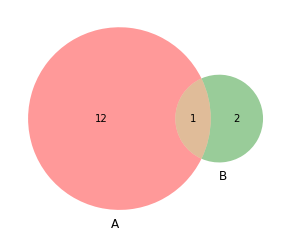

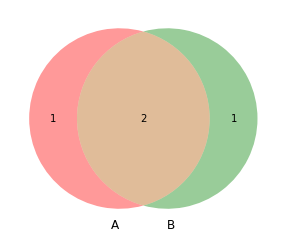

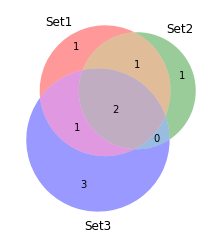

In [4]:
venn2(subsets = (12,2,1))
plt.show()
venn2([set(['A','B','C']), set(['B','C', 'D'])])
plt.show()

set1 = set(['A', 'B', 'C', 'D', 'Z'])
set2 = set(['B', 'C', 'D', 'E'])
set3 = set(['C', 'D',' E', 'F', 'G', 'Z'])

venn3([set1, set2, set3], ('Set1', 'Set2', 'Set3'))
plt.show()

## Heatmap

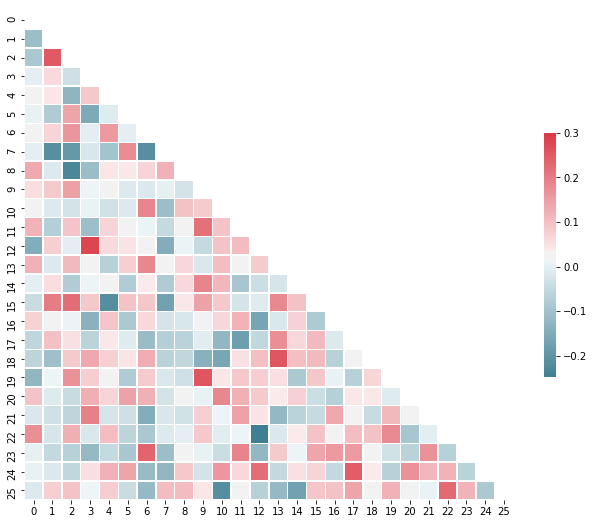

In [9]:
# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)))
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# cmap = sns.light_palette('blue', as_cmap=True)
# cmap = sns.color_palette("summer_r", 100)

# To set NaN color (but not working on all types of sns.palette)
cmap.set_bad('grey',1.)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

## Estimation plots

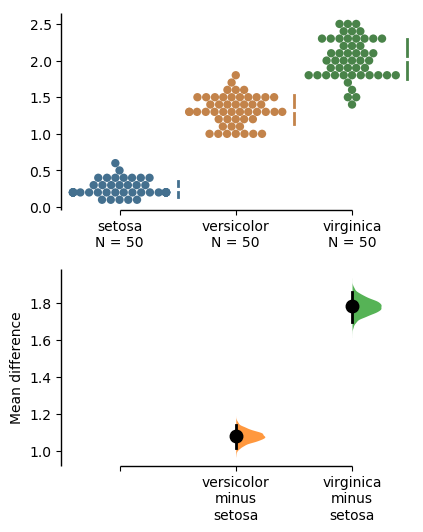

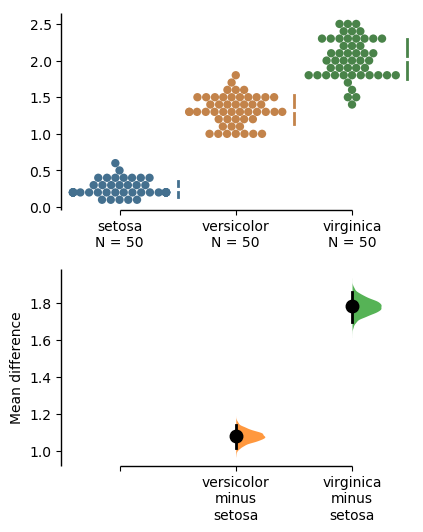

In [10]:
import dabest

# Load the iris dataset. Requires internet access.
iris = pd.read_csv("https://github.com/mwaskom/seaborn-data/raw/master/iris.csv")

# Load the above data into `dabest`.
iris_dabest = dabest.load(data=iris, x="species", y="petal_width",
                          idx=("setosa", "versicolor", "virginica"))

# Produce a Cumming estimation plot.
iris_dabest.mean_diff.plot()

## Stat distributions examepl plots

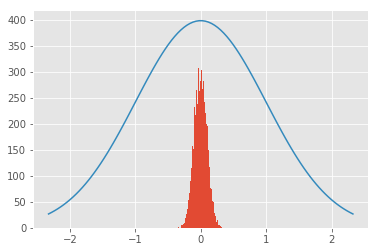

array([-2.32634787, -2.27935095, -2.23235402, -2.18535709, -2.13836017,
       -2.09136324, -2.04436631, -1.99736939, -1.95037246, -1.90337553,
       -1.85637861, -1.80938168, -1.76238475, -1.71538783, -1.6683909 ,
       -1.62139397, -1.57439705, -1.52740012, -1.48040319, -1.43340627,
       -1.38640934, -1.33941241, -1.29241549, -1.24541856, -1.19842163,
       -1.15142471, -1.10442778, -1.05743085, -1.01043393, -0.963437  ,
       -0.91644007, -0.86944314, -0.82244622, -0.77544929, -0.72845236,
       -0.68145544, -0.63445851, -0.58746158, -0.54046466, -0.49346773,
       -0.4464708 , -0.39947388, -0.35247695, -0.30548002, -0.2584831 ,
       -0.21148617, -0.16448924, -0.11749232, -0.07049539, -0.02349846,
        0.02349846,  0.07049539,  0.11749232,  0.16448924,  0.21148617,
        0.2584831 ,  0.30548002,  0.35247695,  0.39947388,  0.4464708 ,
        0.49346773,  0.54046466,  0.58746158,  0.63445851,  0.68145544,
        0.72845236,  0.77544929,  0.82244622,  0.86944314,  0.91

In [82]:
s = np.random.normal(0,0.1,10000)
count, bins, ignored = plt.hist(s,100)
x = np.linspace(st.norm.ppf(0.01), st.norm.ppf(0.99), 100)
plt.plot(x, st.norm.pdf(x)*1000)
x

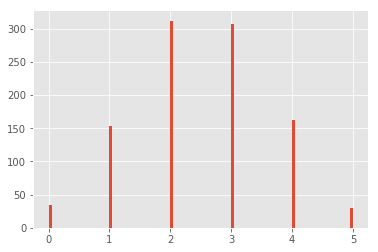

In [35]:
s = np.random.binomial(5, 0.5, 1000)
count, bins, ignored = plt.hist(s, 100)

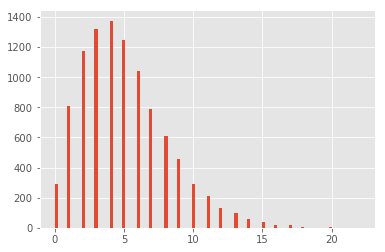

In [37]:
s = np.random.negative_binomial(5, 0.5, 10000)
count, bins, ignored = plt.hist(s, 100)

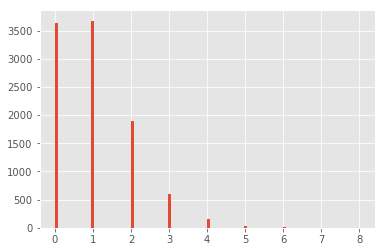

In [49]:
s = np.random.poisson(1, 10000)
count, bins, ignored = plt.hist(s, 100)

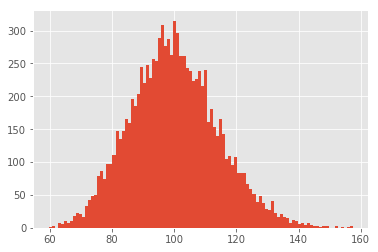

In [68]:
s = np.random.chisquare(100,10000)
count, bins, ignored = plt.hist(s, 100)

# Interactivity

In [1]:
from bokeh.sampledata.iris import flowers
from bokeh.io import output_notebook
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.models.widgets import Tabs, Panel
import pandas as pd

In [2]:
output_notebook()

hover1 = HoverTool(
        tooltips=[
            ('index', '$index'),
            ('index_alias', '@index'),
            ('sepal_length', '@sepal_length'),])

TOOLS = ['crosshair','wheel_zoom', 'box_zoom', 'reset', hover1]

p1 = figure(plot_width=400, plot_height=400, tools=TOOLS)
p1.scatter('sepal_length', 'sepal_width', marker='o', source=flowers)
tab1 = Panel(child=p1, title="Sepals")

# Apparently defining a separate hover for each pan is necessary ...
hover2 = HoverTool(
        tooltips=[
            ('index', '$index'),
            ('index_alias', '@index'),
            ('petal_length', '@petal_length'),])

TOOLS = ['crosshair','wheel_zoom', 'box_zoom', 'reset', hover2]


p2 = figure(plot_width=400, plot_height=400, tools=TOOLS)
p2.scatter('petal_length', 'petal_width', marker='o', source=flowers)
tab2 = Panel(child=p2, title="Petals")

tabs = Tabs(tabs=[tab1,tab2])


show(tabs)

Loading BokehJS ...

## Interactive app1

In [3]:
from ipywidgets import interact
import numpy as np
import ipywidgets as widgets

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [4]:
def f(x):
    return x

interact(f, x=1);

interactive(children=(IntSlider(value=1, description='x', max=3, min=-1), Output()), _dom_classes=('widget-int…

In [5]:
x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

In [6]:
p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5))
r = p.line(x, y, color="#2222aa", line_width=3)

In [7]:
def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    elif f == "tan": func = np.tan
    r.data_source.data['y'] = A * func(w * x + phi)
    push_notebook()

In [8]:
show(p, notebook_handle=True)

In [9]:
interact(update, f=["sin", "cos", "tan"], w=(0,100), A=(1,5), phi=(0, 20, 0.1))

interactive(children=(Dropdown(description='f', options=('sin', 'cos', 'tan'), value='sin'), IntSlider(value=1…

<function __main__.update(f, w=1, A=1, phi=0)>

## Interactive app3

In [10]:
import pandas as pd

from bokeh.palettes import Spectral4
from bokeh.plotting import figure, show
from bokeh.sampledata.stocks import AAPL, IBM, MSFT, GOOG

p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.title.text = 'Click on legend entries to mute the corresponding lines'

for data, name, color in zip([AAPL, IBM, MSFT, GOOG], ["AAPL", "IBM", "MSFT", "GOOG"], Spectral4):
    df = pd.DataFrame(data)
    df['date'] = pd.to_datetime(df['date'])
    p.line(df['date'], df['close'], line_width=2, color=color, alpha=0.8,
           muted_color=color, muted_alpha=0.2, legend=name)

p.legend.location = "top_left"
p.legend.click_policy="mute"
show(p)

RuntimeError: bokeh sample data directory does not exist, please execute bokeh.sampledata.download()

In [12]:
from bokeh.layouts import widgetbox
from bokeh.models.widgets import Select

def update(species):
    p = figure()
    p.hist(flowers[flowers.species == species], title=species)
    show(p)
    
interact(update, species = ['virginica', 'setosa'])

interactive(children=(Dropdown(description='species', options=('virginica', 'setosa'), value='virginica'), Out…

<function __main__.update(species)>